In [3]:
from __future__ import print_function
# !pip install tensorflow==2.0.0
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
import numpy as np
import pandas as pd
from scipy.io import wavfile
import scipy
from scipy import signal
import matplotlib as plt
import matplotlib.pyplot as plt
import tensorflow as tf
from python_speech_features import mfcc
from python_speech_features import logfbank
from python_speech_features import ssc
from scipy.fft import fft, ifft
from matplotlib import cm
import os
import glob
import tensorflow as tf
import cv2

from skimage import data, img_as_float
from skimage import exposure

from keras.utils import to_categorical


Using TensorFlow backend.


In [4]:
path='/media/speech/Data/Files/Thesis_data/coprime_noisy'

In [5]:
backup=pd.HDFStore('backup.h5')

HDF5ExtError: HDF5 error back trace

  File "H5F.c", line 509, in H5Fopen
    unable to open file
  File "H5Fint.c", line 1400, in H5F__open
    unable to open file
  File "H5Fint.c", line 1700, in H5F_open
    unable to read superblock
  File "H5Fsuper.c", line 623, in H5F__super_read
    truncated file: eof = 96, sblock->base_addr = 0, stored_eof = 2048

End of HDF5 error back trace

Unable to open/create file 'backup.h5'

In [ ]:
def gccphat(signal):
    gcc_mat=np.zeros((18,1))
    d=0.2;
    c=340;
    max_lag=d/c*fs
    a=0
    j=[2,3,4,5,6,7,8]
    for i in range(0,5):
        for j in range (i+1,6):
            N=(int(len(signal[:,i]))+int(len(signal[:,j])))-1
            NFFT=int(np.power(2,np.ceil(np.log2(N))));
            rng=range(int(NFFT/2+1-round(max_lag)),int(NFFT/2+1+round(max_lag)))
#             print(rng)
            center=round(max_lag)+1
            Pxx=np.multiply(np.fft.fft(signal[:,i],NFFT),np.conj(np.fft.fft(signal[:,j],NFFT)))
#             gcc=np.multiply(Pxx,(1/abs(Pxx)))
            if all(abs(Pxx))!=0:
                gcc=np.multiply(Pxx,(1/abs(Pxx)))
            else:
                gcc=Pxx
            gcc_phat=np.fft.fftshift(np.fft.ifft(gcc))
            phat_rng=gcc_phat[rng]
            phat_reshape=np.reshape(phat_rng,(phat_rng.size,1))
            gcc_mat=np.column_stack((gcc_mat,phat_reshape))
    return (gcc_mat)

In [5]:
# data=[]
# foldername=20
# file=np.array(os.listdir(path+'/20/20_train'))
# data.append((file,foldername))
# df=pd.DataFrame(file,columns=['X'])
# df['Y']=foldername
# df.to_excel(path+'/20/train_20.xlsx',index=False)

In [6]:
# df1=pd.DataFrame()
# for i in range (0,25,5):
#     k=str(i)
#     file=np.array(os.listdir(path+'/'+k+'/'+k+'_val'))
#     data.append((file,i))
#     df=pd.DataFrame(file,columns=['X'])
#     df['Y']=i
#     df1=pd.concat([df1,df],ignore_index=True)
# df1.to_excel(path+'/train1.xlsx')

In [7]:
# see=tf.InteractiveSession()
# Y=tf.one_hot(indices=[2],depth=5)
# with tf.Session() as sess:
#     print (sess.run(Y))

In [8]:
# data=pd.read_excel('train.xlsx')
# plot_0=np.arange(0,960,40)
# for i in plot_0:
#     [fs,signal]=[fs,signal]=scipy.io.wavfile.read(path+'/train/'+data.loc[i]['X'])
#     x=gccphat(signal)
# #     print(x.shape,signal.shape)
#     plt.matshow(abs(x),cmap='jet')
# #     plt.plot(abs(x))
#     plt.title(data.loc[i]['X'])

In [9]:
# [fs,signal]=scipy.io.wavfile.read(path+'/train/'+data.loc[100]['X'])
# x=gccphat(signal)

In [9]:
data=pd.read_excel('train.xlsx')
data_val=pd.read_excel('val.xlsx')
data_test=pd.read_excel('test.xlsx')

In [16]:

train_data=[]
print(len(data.loc[:]['X']))
for i in range (0,len(data.loc[:]['X'])):
    print(i)
    [fs,signal]=scipy.io.wavfile.read(path+'/train/'+data.loc[i]['X'])
    x=gccphat(signal)
    train_data.append(abs(x))
train_data=np.array(train_data)
(np.array(train_data).shape)
print(train_data)

1440
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

In [17]:

val_data=[]
print(len(data_val.loc[:]['X']))
for i in range (0,len(data_val.loc[:]['X'])):
    print(i)
    [fs,signal]=scipy.io.wavfile.read(path+'/val/'+data_val.loc[i]['X'])
    x=gccphat(signal)
    val_data.append(abs(x))
val_data=np.array(val_data)
(np.array(val_data).shape)
# print(train_data)

30
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


(30, 18, 16)

In [18]:

test_data=[]
print(len(data_test.loc[:]['X']))
for i in range (0,len(data_test.loc[:]['X'])):
    print(i)
    [fs,signal]=scipy.io.wavfile.read(path+'/test/'+data_test.loc[i]['X'])
    x=gccphat(signal)
    test_data.append(abs(x))
test_data=np.array(test_data)
(np.array(test_data).shape)
# print(train_data)

15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


(15, 18, 16)

In [14]:
# t=[]
# train_labels=[]
# # see=tf.InteractiveSession()
# for i in range (0,50):
#     labels=data.loc[i]['Y']
#     if labels == 5:
#         labels = 1
#     elif labels == 10:
#         labels = 2
# #     elif labels == 15:
# #         labels = 3
#     elif labels == 20:
#         labels = 3
# #     print(labels)
#     Y=tf.one_hot(indices=[labels],depth=5)
#     t=tf.Tensor.eval(Y)
#     train_labels.append(t)
# train_labels=np.array(train_labels)
# # print(b[1])
# #     t.append(Y)
# #     with tf.Session() as sess:
# #         print (sess.run(Y))
# #     t=tf.stack([t,Y],0)
# # print(t)
# with tf.Session() as sess:
#     print (sess.run(t))
# (train_labels).shape

In [22]:
v=np.max(train_data)
print(v)

1.0


In [19]:
np.save('train_data.npy',train_data)
np.save('test_data.npy',test_data)
np.save('val_data.npy',val_data)

In [10]:
train_data=np.load('train_data.npy')
test_data=np.load('test_data.npy')
val_data=np.load('val_data.npy')

In [11]:
labels=[]
t=[]
for i in range (0,len(data.loc[:]['Y'])):
    labels=data.loc[i]['Y']
    if labels == 5:
        labels = 1
    elif labels == 10:
        labels = 2
#     elif labels == 15:
#         labels = 3
    elif labels == 20:
        labels = 4
#     if t!=0:
#         t=(np.divide(t,3)).tolist()
    t.append(labels)
t=np.array(t)
# for i in range (0,len(t)):
#     if t[i]!=0:
#         t=np.divide(t[i],np.max(t))
t=np.array(np.reshape(t,(len(data.loc[:]['Y']),1)),dtype=np.float32)
# t=np.divide(t,np.max(t))
print((t.shape))
# encoded=to_categorical(t)
# encoded[749]

(1440, 1)


In [12]:
labels1=[]
val_labels=[]
for i in range (0,len(data_val.loc[:]['Y'])):
    labels1=data_val.loc[i]['Y']
#     if labels == 5:
#         labels = 1
#     elif labels == 10:
#         labels = 2
# #     elif labels == 15:
# #         labels = 3
#     elif labels == 20:
#         labels = 4
# #     if t!=0:
#         t=(np.divide(t,3)).tolist()
    val_labels.append(labels1)
val_labels=np.array(val_labels)
# for i in range (0,len(t)):
#     if t[i]!=0:
#         t=np.divide(t[i],np.max(t))
val_labels=np.array(np.reshape(val_labels,(len(data_val.loc[:]['Y']),1)),dtype=np.float32)
# t=np.divide(t,np.max(t))
print((val_labels.shape))
# encoded=to_categorical(t)
# encoded[749]

(30, 1)


In [13]:
labels2=[]
test_labels=[]
for i in range (0,len(data_test.loc[:]['Y'])):
    labels2=data_test.loc[i]['Y']
#     if labels == 5:
#         labels = 1
#     elif labels == 10:
#         labels = 2
# #     elif labels == 15:
# #         labels = 3
#     elif labels == 20:
#         labels = 4
# #     if t!=0:
#         t=(np.divide(t,3)).tolist()
    test_labels.append(labels2)
test_labels=np.array(test_labels)
# for i in range (0,len(t)):
#     if t[i]!=0:
#         t=np.divide(t[i],np.max(t))
test_labels=np.array(np.reshape(test_labels,(len(data_test.loc[:]['Y']),1)),dtype=np.float32)
# t=np.divide(t,np.max(t))
print((test_labels.shape))
# encoded=to_categorical(t)
# encoded[749]

(15, 1)


In [38]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data,t))
(train_dataset)
val_dataset=tf.data.Dataset.from_tensor_slices((val_data,val_labels))
(val_dataset)
test_dataset=tf.data.Dataset.from_tensor_slices((test_data,test_labels))
(test_dataset)

<DatasetV1Adapter shapes: ((18, 16), (1,)), types: (tf.float64, tf.float32)>

In [39]:
# tensor = train_dataset.make_one_shot_iterator().get_next()
# with tf.Session() as see:
#     print(see.run(tensor))

In [40]:
BATCH_SIZE = 5
SHUFFLE_BUFFER_SIZE = 5

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
train_dataset
val_dataset=val_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset
# test_dataset=test_dataset.shuffle(2).batch(2)
# test_dataset

<DatasetV1Adapter shapes: ((?, 18, 16), (?, 1)), types: (tf.float64, tf.float32)>

In [41]:
model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(18,29)),
    tf.keras.layers.Flatten(input_shape=(18,16)),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150,input_shape=(18,29),activation='relu',return_sequences=True)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation='relu'),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='relu'),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])
# model.build(input_shape=(18,29,1))
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history=model.fit(train_dataset,epochs=200,validation_data=val_dataset)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               73984     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_29 (Dense)             (None, 3)                

288/288 [==============================] - 0s 2ms/step - loss: 74514609.5036 - acc: 0.6306 - val_loss: 3.3215 - val_acc: 0.8667
Epoch 50/200
288/288 [==============================] - 1s 2ms/step - loss: 65698401.5037 - acc: 0.6535 - val_loss: 3.3220 - val_acc: 0.9000
Epoch 51/200
288/288 [==============================] - 1s 2ms/step - loss: 109170104.6143 - acc: 0.6674 - val_loss: 3.3226 - val_acc: 0.9000
Epoch 52/200
288/288 [==============================] - 1s 2ms/step - loss: 151998623.7272 - acc: 0.6667 - val_loss: 3.3232 - val_acc: 0.9000
Epoch 53/200
288/288 [==============================] - 1s 2ms/step - loss: 100289974.8397 - acc: 0.6625 - val_loss: 3.3238 - val_acc: 0.9000
Epoch 54/200
288/288 [==============================] - 1s 2ms/step - loss: 74040340.1735 - acc: 0.6715 - val_loss: 3.3246 - val_acc: 0.9000
Epoch 55/200
288/288 [==============================] - 1s 2ms/step - loss: 80851370.3961 - acc: 0.6576 - val_loss: 3.3252 - val_acc: 0.9333
Epoch 56/200
288/288 [=

Epoch 107/200
288/288 [==============================] - 1s 2ms/step - loss: 76361357.1071 - acc: 0.8250 - val_loss: 3.3733 - val_acc: 0.9667
Epoch 108/200
288/288 [==============================] - 1s 2ms/step - loss: 50227353.3301 - acc: 0.8292 - val_loss: 3.3743 - val_acc: 0.9667
Epoch 109/200
288/288 [==============================] - 0s 2ms/step - loss: 100293292.2210 - acc: 0.8236 - val_loss: 3.3753 - val_acc: 0.9667
Epoch 110/200
288/288 [==============================] - 0s 2ms/step - loss: 87929699.3329 - acc: 0.8083 - val_loss: 3.3764 - val_acc: 0.9667
Epoch 111/200
288/288 [==============================] - 0s 2ms/step - loss: 136560557.9994 - acc: 0.8306 - val_loss: 3.3774 - val_acc: 0.9667
Epoch 112/200
288/288 [==============================] - 0s 2ms/step - loss: 68231174.8911 - acc: 0.8410 - val_loss: 3.3784 - val_acc: 0.9667
Epoch 113/200
288/288 [==============================] - 0s 2ms/step - loss: 90346445.1144 - acc: 0.8278 - val_loss: 3.3793 - val_acc: 0.9667
Epoc

288/288 [==============================] - 0s 2ms/step - loss: 58904918.0516 - acc: 0.9236 - val_loss: 3.4284 - val_acc: 1.0000
Epoch 165/200
288/288 [==============================] - 1s 2ms/step - loss: 41812002.4997 - acc: 0.9333 - val_loss: 3.4295 - val_acc: 1.0000
Epoch 166/200
288/288 [==============================] - 0s 2ms/step - loss: 33843023.8312 - acc: 0.9208 - val_loss: 3.4305 - val_acc: 1.0000
Epoch 167/200
288/288 [==============================] - 0s 2ms/step - loss: 39117525.1675 - acc: 0.9208 - val_loss: 3.4317 - val_acc: 1.0000
Epoch 168/200
288/288 [==============================] - 1s 2ms/step - loss: 102518769.6102 - acc: 0.9319 - val_loss: 3.4331 - val_acc: 1.0000
Epoch 169/200
288/288 [==============================] - 0s 2ms/step - loss: 92977454.0594 - acc: 0.9347 - val_loss: 3.4340 - val_acc: 1.0000
Epoch 170/200
288/288 [==============================] - 0s 2ms/step - loss: 54672133.1679 - acc: 0.9354 - val_loss: 3.4351 - val_acc: 1.0000
Epoch 171/200
288/2

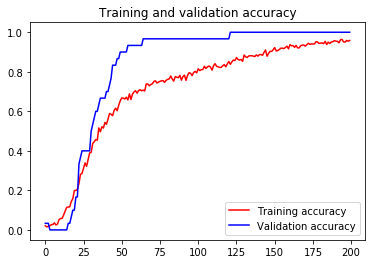

<Figure size 432x288 with 0 Axes>

In [42]:
# epochs=100;

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
results = model.predict(test_dataset)